<h2> Segmentation & Targeting 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
Portlandfamilies = pd.read_csv("portland_families.csv")
Portlandfamilies.head()

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,county,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1,3,own,3309,80464,1,York,2535,2842,1,No
1,2,3,own,3814,47696,2,York,2913,3938,1,No
2,3,3,rent,2592,108256,2,Cumberland,1986,3687,2,No
3,4,2,own,2628,68064,1,Cumberland,2505,2826,1,No
4,5,3,rent,2442,62786,2,Sagadahoc,3541,1344,2,No


<i> We will remove the household ID column as this may not be required in the analysis.Let's ensure that the dataset doesn't contain any NaN value. 

In [3]:
Portlandfamilies.isnull().values.any()

False

In [4]:
Portlandfamilies.describe()

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,3.130067,3118.928600,72555.562067,1.509200,2651.515000,3556.169400,1.766533
std,4330.271354,0.891592,815.925967,18758.466766,0.790163,766.499083,599.815642,0.732072
min,1.000000,1.000000,370.000000,6801.000000,0.000000,193.000000,924.000000,0.000000
25%,3750.750000,3.000000,2506.000000,60007.000000,1.000000,2140.000000,3173.750000,1.000000
50%,7500.500000,3.000000,3042.000000,72512.000000,2.000000,2650.000000,3573.000000,2.000000
75%,11250.250000,4.000000,3738.000000,85201.750000,2.000000,3158.250000,3961.000000,2.000000
max,15000.000000,7.000000,6081.000000,145381.000000,4.000000,5541.000000,5908.000000,4.000000


In [5]:
Portlandfamilies = Portlandfamilies.drop(columns=["own_rent","county","LL_passholder","householdID"])
Portlandfamilies.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
0,3,3309,80464,1,2535,2842,1
1,3,3814,47696,2,2913,3938,1
2,3,2592,108256,2,1986,3687,2
3,2,2628,68064,1,2505,2826,1
4,3,2442,62786,2,3541,1344,2


<i> Standardizing the variables helps in establishing a common scale to measure the different variables. Since the range and units of our variables is different, they need to be normalized. This allows for direct comparison between the different variables and helps analyse the clustering models in an better manner.

In [23]:
from sklearn.preprocessing import StandardScaler 

data_scaling = StandardScaler()
data_scaling.fit(Portlandfamilies)

Portlandfamilies_normalize = data_scaling.transform(Portlandfamilies)
Portlandfamilies_normalize = pd.DataFrame(data = Portlandfamilies_normalize, index = Portlandfamilies.index , columns = Portlandfamilies.columns)
#print(Portlandfamilies_normalize.describe().round(2))

In [30]:
from scipy.stats import zscore

Portlandfamilies1 = Portlandfamilies.apply(zscore)
Portlandfamilies1.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
0,-0.145886,0.232960,0.421607,-0.644446,-0.152014,-1.190688,-1.047109
1,-0.145886,0.851909,-1.325289,0.621159,0.341153,0.636601,-1.047109
2,-0.145886,-0.645826,1.903227,0.621159,-0.868282,0.218125,0.318923
3,-1.267513,-0.601703,-0.239450,-0.644446,-0.191155,-1.217364,-1.047109
4,-0.145886,-0.829672,-0.520825,0.621159,1.160490,-3.688205,0.318923


<b> Elbow method 

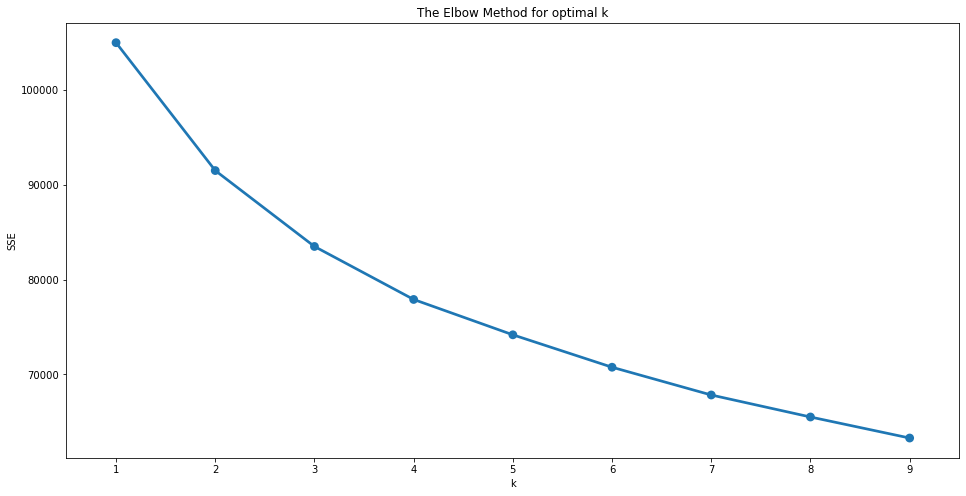

In [25]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=500)
    kmeans.fit(Portlandfamilies1)
    sse[k] = kmeans.inertia_
    
    
plt.figure(figsize=(16,8))
plt.title('The Elbow Method for optimal k')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

<i><b> Optimal number of clusters chosen : 5 clusters </b> <br>
    On the basis of the elbow method used above, we feel that 5 is the optimal number of clusters that should be used because after this point the distortion starts declining in a linear fashion. The "elbow" is based on the reducing the sum of squared differences to a point wherein analyzing becomes easier but selecting too many clusters will reduce the accuracy of the analysis drawn. I have also used the experimentation method to use how the statistics vary in terms of changes in the number of clusters. 

<i>K-means clustering has been used. The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. A cluster refers to a collection of data points aggregated together because of certain similarities. Common characteristics of all those within a cluster help in better targeting, and reduce marketing costs and efficient use of resources. 

In [33]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 5, random_state = 500)
kmeans_model.fit(Portlandfamilies_normalize)
cluster_labels = kmeans_model.labels_


Portlandfamilies1_cluster = Portlandfamilies.assign(Cluster = cluster_labels)
grouped = Portlandfamilies1_cluster.groupby(['Cluster'])

grouped.agg({
'total_ppl' : 'mean', 
'square_foot': 'mean',
'household_income' : 'mean',
'number_pets' : 'mean',
'entertainment_spend_est' : 'mean',
'travel_spend_est' : ['mean','count'],
'under_12' : 'mean'}).round(2)

total_ppl square_foot household_income number_pets  \
             mean        mean             mean        mean   
Cluster                                                      
0            2.83     2541.45         58474.58        1.48   
1            2.75     2631.27         82767.32        1.50   
2            2.93     3731.39         73901.24        2.28   
3            2.95     3714.48         74756.14        0.75   
4            4.28     2961.08         72905.14        1.51   

        entertainment_spend_est travel_spend_est       under_12  
                           mean             mean count     mean  
Cluster                                                          
0                       3031.40          3117.24  3045     1.58  
1                       1998.70          3327.19  3047     1.54  
2                       2754.62          3911.94  3099     1.69  
3                       2817.11          3941.93  3004     1.67  
4                       2657.01          3475.20  2805     2.42

In [45]:
Portlandfamilies1_cluster.columns

Index(['total_ppl', 'square_foot', 'household_income', 'number_pets',
       'entertainment_spend_est', 'travel_spend_est', 'under_12', 'Cluster'],
      dtype='object')

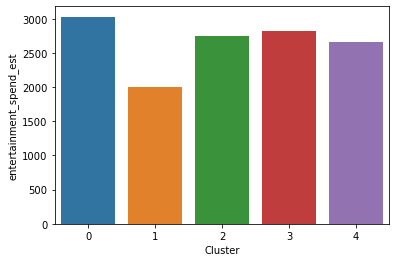

In [35]:
sns.barplot(data = Portlandfamilies1_cluster, x = 'Cluster', y = 'entertainment_spend_est', ci = None)

<i> As can be seen, Cluster 0 spends the maximum on entertainment, followed by cluster 3. Cluster 1 spends the least on entertainment.

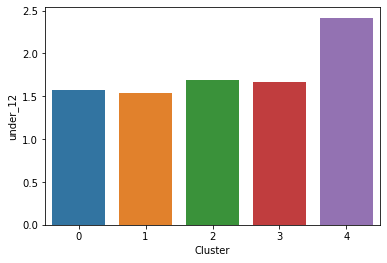

In [36]:
sns.barplot(data = Portlandfamilies1_cluster, x = 'Cluster', y = 'under_12', ci = None)

<i> There is a huge difference here as cluster 4 consists of a large number of childrne undre the age of 12 years, whereas the other clusters consist of a comparable less number of children under 12 years of age

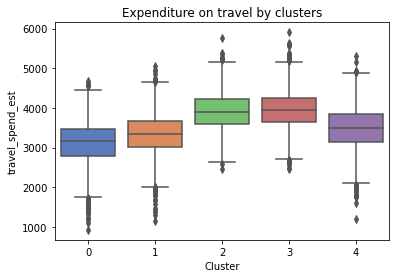

In [37]:
sns.boxplot(x= "Cluster", y="travel_spend_est", data=Portlandfamilies1_cluster, palette = "muted").set_title('Expenditure on travel by clusters');

<i> The boxplot shows that the median expenditure on travel by cluster 3 is the highest, followed by cluster 2. Cluster 0 and cluster 1 have the maximum outliers showing great variation. Cluster 0 has the least median expenditure on traveling.

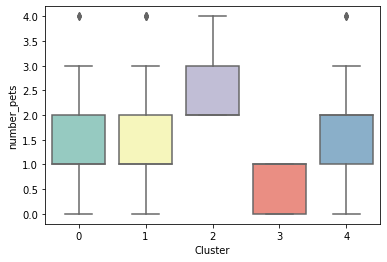

In [54]:
sns.boxplot(x="Cluster", y="number_pets", palette="Set3",data=Portlandfamilies1_cluster)

<i> Cluster 2 has the largest number of pets while cluster 3 is the least popular for pets. Other three clusters have almost equal affinity towards pets. 

Text(0.5, 1.0, 'Plot of Household_income with Entertainmain cost')

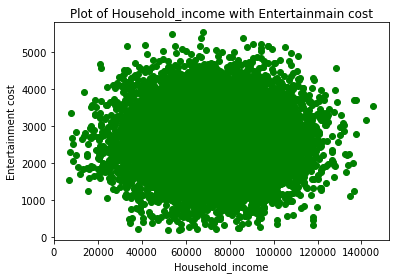

In [44]:
x = Portlandfamilies1_cluster['household_income']
y = Portlandfamilies1_cluster['entertainment_spend_est']

plt.scatter(x,y,color="green")
plt.xlabel("Household_income")
plt.ylabel("Entertainment cost")
plt.title("Plot of Household_income with Entertainmain cost")

<i> The plot shows the household income along with the expenditure on entertainment. It can be seen how due to the large number of families earning between 50000 dollars to 90000 dollars, it is the most concentrated area. It starts getting distorted at the ends due to lesse number of families and hence less expenditure. 

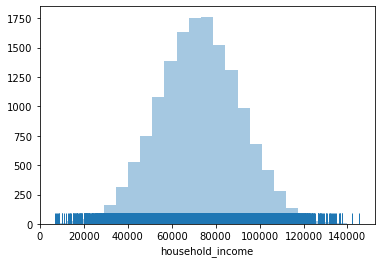

In [42]:
sns.distplot(Portlandfamilies1_cluster.household_income,rug=True,kde=False,bins=25)

<i>The plot above shows how the largest number of families in Portland have a household income of around 60000 to 80000 dollars. The range of household income is between 30000 dollars to 120000 dollars. There is an increasing trend amngst number of families as we go from 30000 dollars to 80000 dollars of household income, and then it gradually keeps decreasing. 

In [40]:
Portlandfamilies1_cluster.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean',
'under_12': 'mean'
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
Cluster,,,,,,,
0,2.83,2541.45,58474.58,1.48,3031.40,3117.24,1.58
1,2.75,2631.27,82767.32,1.50,1998.70,3327.19,1.54
2,2.93,3731.39,73901.24,2.28,2754.62,3911.94,1.69
3,2.95,3714.48,74756.14,0.75,2817.11,3941.93,1.67
4,4.28,2961.08,72905.14,1.51,2657.01,3475.20,2.42


<i> Cluster[0] = Looking for entertainment<br>
Cluster[1]=  Small, wealthy families<br>
Cluster[2] = Luxurious Lives<br>
Cluster[3]=  All about Travel<br>
Cluster[4]=  It's family time<br>

<i> Cluster (0) <b> - Looking for entertainment!</b> : This cluster consists of people with the least household income, but spend the highest on entertainment. They do not spend on travelling as much though. They also have the least residential area in terms of square feet. The cluster doesn't have a large number of children below the age of 12 years, and an average number of pets as compared to other clusters. 

<i> Cluster (1)- <b> Small, Wealthy families! </b> : This cluster consists of families that are richest amongst all other families. The family size is small, with very few children under the age if 12 years. It is interesting to see that even though they're the wealthiest amongst the sample chosen, they have spent the least on entertainment and travel. They do not seem like families who are outging. 

<i> Cluster (2) - <b> Luxurious Lives  </b> : The cluster is characterized by families having high incomes, big houses, children under the age of 12 years and are moderately sized families. Pets are the most common amongst this cluster when compared to others. They spend a big amount on traveling annually, and a considerable amount on entertainment too.

<i> Cluster (3) - <b> All about travel </b> : These are families who earn considerably well, own big houses and love spending on both travel and entertainment. Pets however are not popular amongst this cluster. Many of these have kids under the age of 12 years too. 

<i> Cluster (4) - <b> It's Family Time! </b> - The cluster consists of large families, that have kids under the age of 12 years and also own pets. They spend a moderate amount on entertainment and travel and also learn a considerable amount. These families seem to enjoy lobster land as a getaway with each other. 

<h3> Targeting based on Clusters </h3> <br>
<i> The families belonging to the cluster "Looking for entertainment" must be provided with coupons or deals related to Goldzone and other Lobster Land rides as they do tend to spend on entertainment but have low incomes. Hence, the segment can be enticed by lower prices. Especially, in the Covid times when Lobster Land's business is affected amd needs more crowd, this segment can be capitalized upon by providing discounts to them. <br> <br>
    Major marketing efforts must not be focused on the cluster "Small, Wealthy families" as they do have the monetary resources, but do not tend to spend on entertainment. Since the income is very high compared to other clusters, they do not seem to be a price sensitive segment. One marketing startegy for this segment could be to provide them with a complete getaway pass - wherein they can book private access slots to Goldzone, meals at 4-star resturants and priority access to rides. <br> <br>
    Marketing initiatives must be focused on this segment. Frequent customised emails and messages msut be sent to these families to remind them of Lobster Land as they do have high incomes and spend well too. They just need to be encouraged to visit more often. Also, this segment can be enticed by inviting them for pet-friendly activities and events. Secondly, one marketing strategy could be to provide them with a premium membership which would provide them with a package including overnight stay at a neraby 4-star hotel with all ameneties, top restaurants and all day express (priority) access to lobster Land rides and activities. <br> <br>
    In order to attract the cluster "All about Travel", coupons can be sent to this segment which provides them with discounts at places which Lobster land has tie-ups with, since this segment loves traveling. They must also be sent customized messages informing them about events conducted for kids. <br> <br>
    The cluster "It's family Time" is all about spending time with families. Since they have a large number of children under the age of 12 years, they must be sent specialized messages/emails informing them about events and activties for kids, such as winter Wonderland. Also, over if they are a group of more than 4 people, they would be given 10% discount on goldzone pass and rides and free access to pet-friendly areas. 